In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/daily-minimum-temperatures.csv")

In [4]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df.shape

(3650, 2)

In [6]:
df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [7]:
df.dtypes

Date     object
Temp    float64
dtype: object

**Visualizing the Daily Temperture**

In [8]:
from matplotlib import pyplot as plt

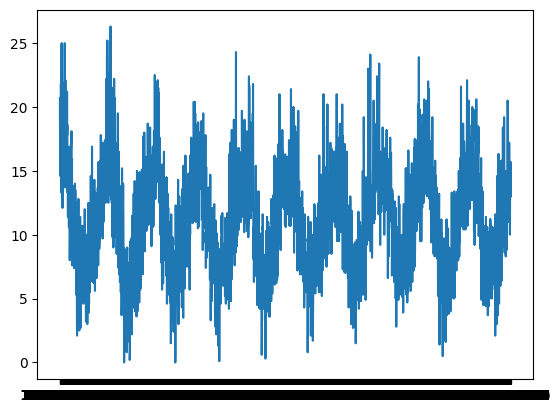

In [9]:
plt.plot(df['Date'], df['Temp'])
plt.title('')
plt.show()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

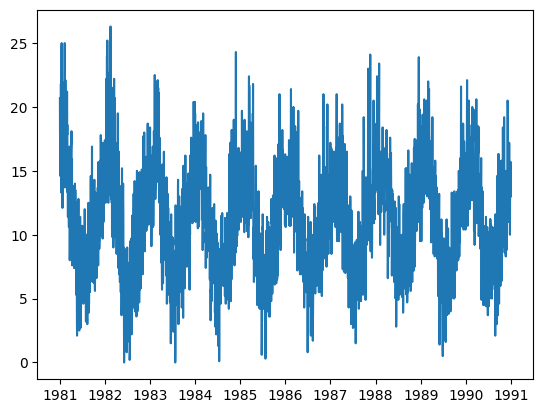

In [12]:
plt.plot(df['Date'],df['Temp'])
plt.show()


<Axes: xlabel='Temp', ylabel='Density'>

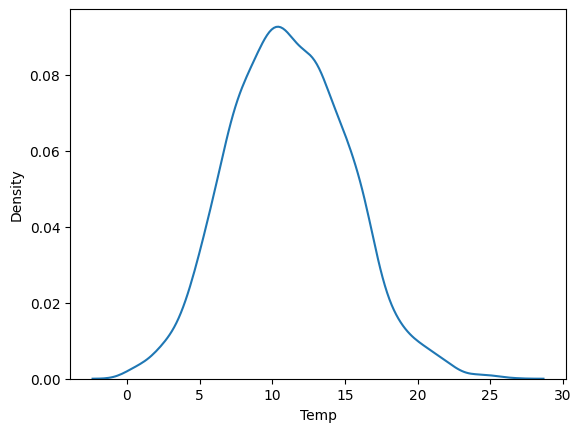

In [13]:
import seaborn as sns
sns.kdeplot(df['Temp'])

In [14]:
df.index

RangeIndex(start=0, stop=3650, step=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ed49bd05c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed49bd061d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed49bd059f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ed49bd06710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ed49bd069b0>],
 'means': []}

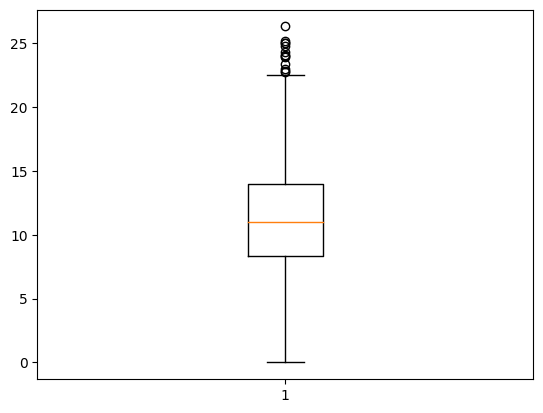

In [15]:
plt.boxplot(df['Temp'])

<Axes: >

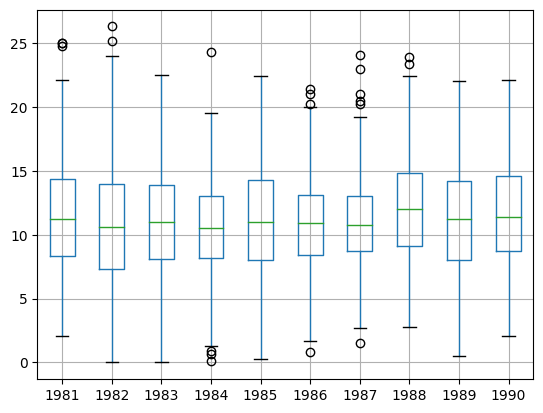

In [23]:
from pandas import Grouper, DataFrame
import pandas as pd

df = pd.read_csv("/content/daily-minimum-temperatures.csv", index_col=0, parse_dates=True)
groups = df.groupby(Grouper(freq='A'))
years = DataFrame()

for name, group in groups:
    years[name.year] = group.values.flatten()  # Flatten the values to make them 1-dimensional

years.boxplot()


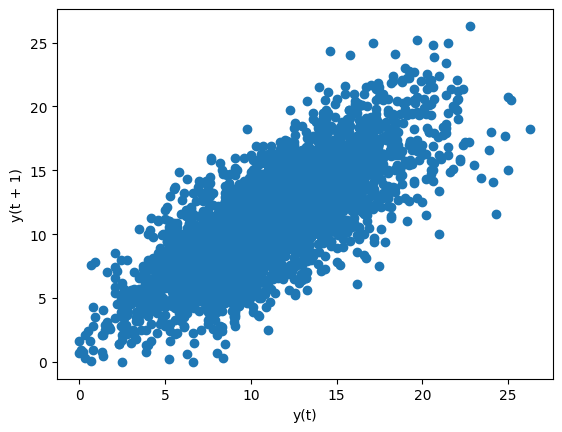

In [25]:
from pandas.plotting import lag_plot
lag_plot(df,lag=1)
plt.show()

### Observation:

**There is a good correlation between previous day temperature with current day temperature.**

## ACF - AutoCorrelation Function plot

<Figure size 4000x4000 with 0 Axes>

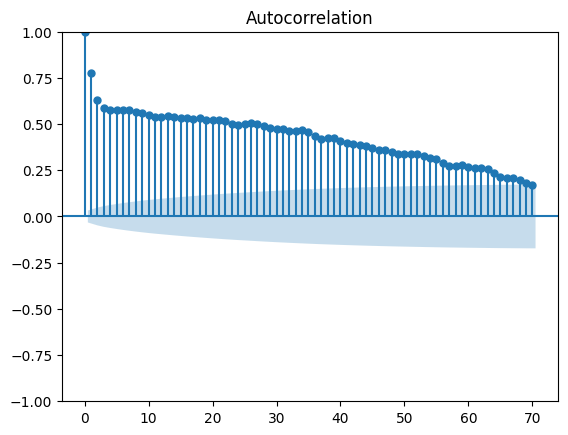

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (40,40))
plot_acf(df,lags=70)
plt.show()